In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X = 3*np.random.rand(100,1)
y = 2*X + 5 + np.random.rand(100,1)

Text(0, 0.5, 'y')

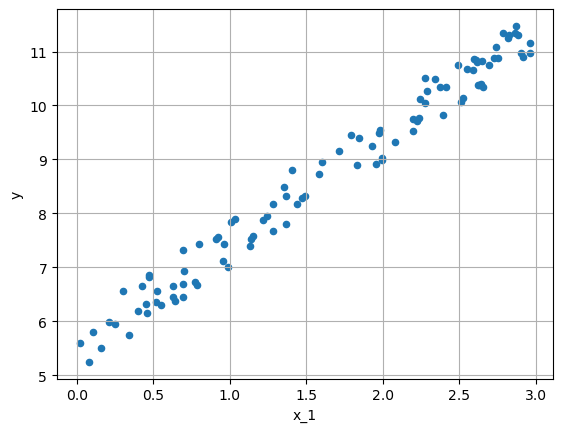

In [5]:
plt.scatter(X,y,s=20)
plt.grid()
plt.xlabel('x_1')
plt.ylabel('y')

# Calcul de $\hat{\theta}$ par l'équation normale $$ \hat{\theta} = (X^T .X)^{-1}.X^T.y $$

## Créer la matrice X

In [6]:

vecteur_1 = np.ones_like(X) 
matrice_x = np.c_[vecteur_1,X]
matrice_x



array([[1.        , 0.91123309],
       [1.        , 0.52657458],
       [1.        , 2.61940708],
       [1.        , 2.63965717],
       [1.        , 2.72734954],
       [1.        , 2.07684877],
       [1.        , 1.99399233],
       [1.        , 0.42721969],
       [1.        , 0.33991702],
       [1.        , 2.6289587 ],
       [1.        , 1.98138667],
       [1.        , 0.62534633],
       [1.        , 0.55010622],
       [1.        , 2.78337878],
       [1.        , 2.19599799],
       [1.        , 0.69503808],
       [1.        , 2.86695736],
       [1.        , 0.69969077],
       [1.        , 1.13288996],
       [1.        , 0.76922627],
       [1.        , 2.7422828 ],
       [1.        , 1.36968131],
       [1.        , 0.78201085],
       [1.        , 0.45786935],
       [1.        , 2.5901868 ],
       [1.        , 2.60981339],
       [1.        , 1.35107579],
       [1.        , 0.15508848],
       [1.        , 2.22490018],
       [1.        , 1.40728091],
       [1.

## Calculer $\hat{\theta}$

In [7]:
part_1 =  np.linalg.inv(np.dot(np.transpose(matrice_x),matrice_x))
part_2 = np.dot(np.transpose(matrice_x),y)
transpose  = np.dot(part_1 , part_2)
transpose

array([[5.46268872],
       [1.98262692]])

## Tracez la droite du modèle

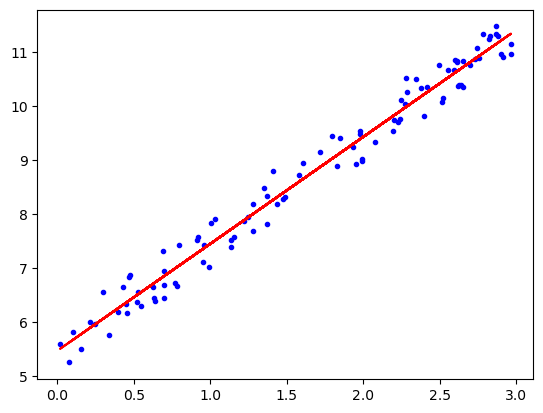

In [8]:
y_prediction = matrice_x.dot(transpose)
plt.plot(X,y,'b.',X,y_prediction,'r')

## Prédiction des valeurs correspondantes aux 0, 1, 1.5 et 2

In [9]:
new_data = np.array([0,1,1.5,2])
X_new = np.c_[np.ones_like(new_data) , new_data]
Y_new = X_new.dot(transpose)
Y_new

array([[5.46268872],
       [7.44531564],
       [8.4366291 ],
       [9.42794257]])

# Regression en utilisant Scikit-Learn

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr = LinearRegression() # instanciation d'un objet

In [48]:
lr.fit(X,y) #Training

LinearRegression()

## Coefficients

In [49]:
lr.intercept_, lr.coef_

(array([5.46268872]), array([[1.98262692]]))

# Gradient Descent

[[5.46268872]
 [1.98262692]]


<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

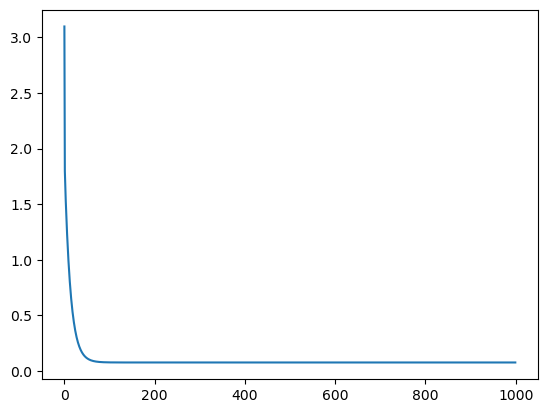

In [32]:
theta = np.random.randn(2,1)
m = 100
# On implemente le gradiant :
mu = 0.1
erreur_quadratique = list()
for k in range(1000): ### On doit mettre la valeur 1000 a 200 car d'apres la courbe l'erreur s'arrte plus ou moin la bas 
    gradient = 2/m * matrice_x.T.dot(matrice_x.dot(theta)-y)
    theta = theta - mu*gradient
    e = (matrice_x.dot(theta)-y)**2
    erreur_quadratique.append(e.sum()/m)
    
print(theta)
plt.plot(erreur_quadratique)
plt.grid

# Stochastic Gradient Descent

[[5.33417401]
 [2.01218578]]


<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

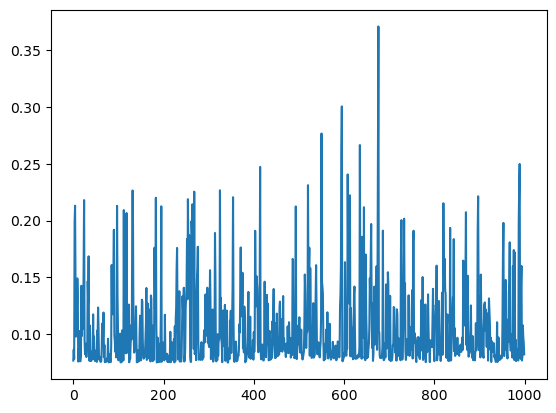

In [40]:
def coef_apprentissage(t):
    return 5/(t+50)

0.05555555555555555

[[5.42224222]
 [2.04622185]]


<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

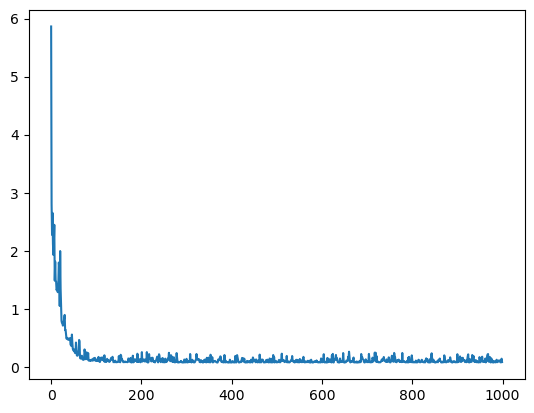

In [45]:

theta = np.random.randn(2,1)
m = 100
# On implemente le gradiant :
erreur_quadratique = list()
for k in range(1000): ### On doit mettre la valeur 1000 a 200 car d'apres la courbe l'erreur s'arrte plus ou moin la bas 
    idx = np.random.randint(m)
    gradient = 2/1 * matrice_x[idx:idx+1].T.dot(matrice_x[idx:idx+1].dot(theta)-y[idx])
    theta = theta - coef_apprentissage(idx)*gradient
    e = (matrice_x.dot(theta)-y)**2
    erreur_quadratique.append(e.sum()/m)

    
print(theta)
plt.plot(erreur_quadratique)
plt.grid

# Résultat

# Stochastic Gradient Descent par scikit-learn

In [50]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(n_iter_no_change=50, eta0=0.1 )

In [51]:
sgd.fit(X,y.ravel())  #Ravel pour changer shape de y on passe de matrice ( 100, 1 ) --> à une liste (100,). 

SGDRegressor(eta0=0.1, n_iter_no_change=50)

In [52]:
sgd.intercept_, sgd.coef_

(array([5.4723953]), array([1.99410288]))